In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv(r"C:\Users\Namrata\Downloads\file\train.csv")
df_test=pd.read_csv(r'C:\Users\Namrata\Downloads\file\test.csv')

# New Section

In [3]:
df.head()

,Id,x0_t0,x0_t1,x0_t2,x0_t3,x0_t4,x0_t5,x0_t6,x1_t0,x1_t1,...,x53_t5,x53_t6,x54_t0,x54_t1,x54_t2,x54_t3,x54_t4,x54_t5,x54_t6,y2
0,706,762.212216,753.162754,754.610620,762.787135,768.170347,769.815486,750.950000,0.902534,0.873314,...,87.200000,87.2,1.788239,1.883677,1.894829,1.865024,1.755078,2.03000,2.03,0.72
1,239,762.671780,746.631882,745.807832,755.992886,761.814347,766.110745,762.535189,1.366119,1.358298,...,72.613391,87.2,1.920067,1.820872,1.863998,1.827162,1.964556,1.96579,2.03,0.62
2,613,766.867777,756.642963,750.059697,756.377980,760.087594,758.380275,750.950000,0.821431,0.825063,...,87.200000,87.2,2.084817,2.019537,2.197232,2.032493,1.976534,2.03000,2.03,0.57
3,588,751.077287,758.230866,761.391167,763.190054,768.715192,770.447814,750.950000,0.712874,0.744777,...,87.200000,87.2,1.853655,1.848088,1.880007,2.068814,1.871028,2.03000,2.03,1.01
4,780,772.430815,772.254344,772.322597,771.926261,768.820073,772.908223,750.950000,0.742664,0.676266,...,87.200000,87.2,2.211915,2.387687,2.368041,2.360032,2.352961,2.03000,2.03,-0.42


In [4]:
df.describe()

,Id,x0_t0,x0_t1,x0_t2,x0_t3,x0_t4,x0_t5,x0_t6,x1_t0,x1_t1,...,x53_t5,x53_t6,x54_t0,x54_t1,x54_t2,x54_t3,x54_t4,x54_t5,x54_t6,y2
count,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,7.940000e+02,7.940000e+02,...,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000
mean,438.658690,754.919194,754.729879,754.646425,754.540917,754.424182,754.535914,752.154530,8.751822e-01,8.713170e-01,...,86.782481,87.233572,1.931834,1.929294,1.929327,1.930606,1.918361,2.004459,2.028760,0.528841
std,254.610219,13.126818,17.596497,13.928037,13.114229,13.238951,13.424742,7.333076,3.501364e-01,3.526789e-01,...,8.688329,1.375731,0.370322,0.416583,0.375554,0.364132,0.373211,0.184948,0.029712,0.184369
min,0.000000,694.863409,436.366425,648.518443,689.144977,682.132476,680.739213,704.677729,-1.164153e-11,-1.164153e-11,...,25.000000,75.965148,0.135551,0.141006,0.123514,0.086733,0.032860,0.079038,1.273031,-1.660000
25%,217.250000,746.507394,746.225540,746.135900,746.381193,746.140993,746.019990,750.950000,6.932981e-01,6.882317e-01,...,87.200000,87.200000,1.804678,1.780031,1.783420,1.802233,1.779655,2.030000,2.030000,0.450000
50%,438.500000,756.095127,756.750034,755.696801,755.539600,756.077535,755.891258,750.950000,7.969188e-01,7.985343e-01,...,87.200000,87.200000,1.964852,1.951801,1.977931,1.974037,1.944210,2.030000,2.030000,0.580000
75%,658.750000,764.434651,764.838969,764.572070,764.113391,764.013162,764.111608,750.950000,1.228083e+00,1.230598e+00,...,87.200000,87.200000,2.136718,2.145547,2.136183,2.135681,2.121476,2.030000,2.030000,0.600000
max,881.000000,790.272046,791.044214,790.588038,789.457827,786.099166,788.762156,785.730598,1.568039e+00,1.596464e+00,...,125.000000,123.653108,3.026312,6.884922,2.994906,2.932883,2.807641,2.729407,2.083415,1.600000


In [47]:
df.isnull().sum()

Id        0
x0_t0     0
x0_t1     0
x0_t2     0
x0_t3     0
         ..
x54_t3    0
x54_t4    0
x54_t5    0
x54_t6    0
y2        0
Length: 387, dtype: int64

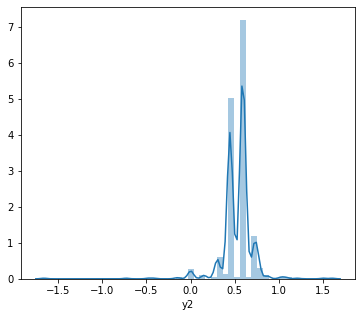

In [5]:
plt.figure(figsize=(6, 5))
p = sns.distplot(
    df['y2']
)


In [6]:
#Standardization of data

mod_df = df[(df.y2<=1) &  (df.y2>=0)]
mod_df.shape
y=mod_df["y2"]






In [7]:
# check mulitcollinearity using VIF: Variance inflation factor
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_scaled = scaler.fit_transform(mod_df)
from statsmodels.stats.outliers_influence import variance_inflation_factor



In [8]:
variables = X_scaled
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif["Features"] = mod_df.columns

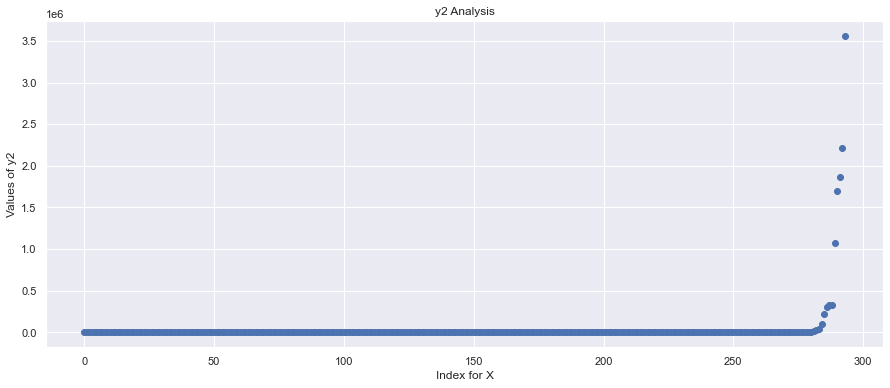

In [9]:
#ploting by removing the outliers
sns.set(rc={'figure.figsize':(15,6)})
plt.title("y2 Analysis")
plt.xlabel("Index for X" )
plt.ylabel("Values of y2")
plt.scatter(range(vif.shape[0]),np.sort(vif.VIF.values))

In [342]:
sorted(vif.VIF)

[2.7242753922060197,
 3.8836536046549597,
 4.057137539432519,
 4.932162807667216,
 5.093868100256227,
 6.0406921477692865,
 6.69881462027048,
 7.370557321748992,
 7.692565148613474,
 8.037311156714276,
 8.080687817829427,
 8.16376088304482,
 10.298089786737773,
 13.48469141069343,
 14.075618501450707,
 14.439944877831067,
 14.670274514055329,
 18.2402671009646,
 19.22289531103819,
 24.251043981262544,
 24.86435366600358,
 34.31201698161761,
 39.50745803173465,
 50.79735950118002,
 55.04018398797386,
 55.72836170004446,
 nan,
 nan,
 2.359745777078993,
 2.6292989524964665,
 3.5722160887259102,
 6.138138949488205,
 7.524572766006022,
 7.926290095271984,
 7.935567195692674,
 8.391707063142219,
 10.081929892461924,
 10.938450186596926,
 14.044166234664207,
 46.66566503218321,
 167.04858565886516,
 180.58075173949436,
 185.3041633360544,
 242.20768021256416,
 261.4510501232511,
 478.42981856618036,
 747.4466675748754,
 762.3718300129658,
 1154.6800314795576,
 2206.1004381669545,
 4675.248573

In [363]:
#no of columns greater than VIF 10
tmp = sorted(vif[(vif["VIF"]<=8.0) & (vif["VIF"]>=4)] ["Features"])
tmp


['x0_t0',
 'x0_t1',
 'x0_t4',
 'x0_t5',
 'x11_t6',
 'x13_t6',
 'x14_t0',
 'x14_t1',
 'x19_t0',
 'x21_t6',
 'x23_t0',
 'x27_t0',
 'x27_t1',
 'x27_t2',
 'x27_t4',
 'x27_t5',
 'x29_t0',
 'x29_t1',
 'x29_t3',
 'x29_t4',
 'x29_t5',
 'x35_t5',
 'x3_t5',
 'x3_t6',
 'x41_t5',
 'x45_t1',
 'x47_t0',
 'x47_t1',
 'x47_t2',
 'x47_t3',
 'x47_t4',
 'x48_t0',
 'x48_t1',
 'x48_t2',
 'x48_t3',
 'x48_t4',
 'x50_t1',
 'x50_t2',
 'x50_t3',
 'x53_t5',
 'x54_t1',
 'x54_t4',
 'x54_t5',
 'x5_t0',
 'x9_t1',
 'x9_t2',
 'x9_t3',
 'x9_t4',
 'x9_t5',
 'x9_t6']

In [364]:
len(tmp)

50

In [365]:
#Removing VIF > 10 
drop_array=tmp
X=mod_df[tmp]


In [366]:
X.shape

(780, 50)

In [176]:
#X.drop('y2',axis=1,inplace=True)

In [367]:
X.head()

,x0_t0,x0_t1,x0_t4,x0_t5,x11_t6,x13_t6,x14_t0,x14_t1,x19_t0,x21_t6,...,x54_t1,x54_t4,x54_t5,x5_t0,x9_t1,x9_t2,x9_t3,x9_t4,x9_t5,x9_t6
0,762.212216,753.162754,768.170347,769.815486,9.400000,495.530000,0.897013,0.897303,80.0,27.0,...,1.883677,1.755078,2.030000,748.773616,0.244055,0.245363,0.248112,0.335132,0.257364,0.310000
1,762.671780,746.631882,761.814347,766.110745,52.836098,427.375337,0.900293,0.900314,80.0,29.0,...,1.820872,1.964556,1.965790,720.968536,0.357220,0.303688,0.256193,0.223815,0.360538,0.240273
2,766.867777,756.642963,760.087594,758.380275,9.400000,495.530000,0.901689,0.901869,80.0,27.0,...,2.019537,1.976534,2.030000,762.066151,0.128335,0.157638,0.295245,0.297705,0.216435,0.310000
5,759.214578,753.733085,755.826560,755.238797,9.400000,495.530000,0.901871,0.901957,80.0,27.0,...,2.196053,2.272081,2.030000,747.682834,0.235546,0.346985,0.262499,0.353931,0.360703,0.310000
6,760.229220,763.722385,760.680692,764.814620,7.266019,477.257824,0.848419,0.848383,80.0,27.0,...,2.094220,2.124493,1.851155,750.388363,0.050311,0.052748,0.046689,0.047468,0.046164,0.047938


In [368]:
print(len(drop_array))

50


In [369]:
var = tmp[:len(tmp)-1]

In [229]:
var

['x0_t1',
 'x0_t4',
 'x0_t5',
 'x11_t6',
 'x19_t0',
 'x21_t6',
 'x27_t0',
 'x27_t1',
 'x27_t2',
 'x27_t5',
 'x29_t0',
 'x29_t1',
 'x29_t3',
 'x29_t4',
 'x29_t5',
 'x3_t5',
 'x45_t1',
 'x47_t0',
 'x47_t1',
 'x47_t2',
 'x47_t3',
 'x47_t4',
 'x48_t0',
 'x48_t1',
 'x48_t2',
 'x48_t3',
 'x48_t4',
 'x50_t1',
 'x50_t2',
 'x50_t3',
 'x53_t5',
 'x54_t1',
 'x54_t5',
 'x5_t0',
 'x9_t1',
 'x9_t2',
 'x9_t3',
 'x9_t5']

In [370]:
#drop_array_test=tmp

X_test_p=df_test[tmp]

In [371]:

# Actual Traing data - (794,387)
print(X.shape)
print(X_test_p.shape)


(780, 50)
(89, 50)


In [327]:
X_test_p.head()

,x0_t0,x0_t1,x0_t4,x0_t5,x0_t6,x10_t5,x11_t6,x13_t6,x14_t0,x14_t1,...,x54_t4,x54_t5,x5_t0,x9_t0,x9_t1,x9_t2,x9_t3,x9_t4,x9_t5,x9_t6
0,738.152456,747.990517,754.378901,746.444051,750.95,81.294021,9.4,495.53,0.901902,0.901779,...,1.480912,2.03,750.314288,0.162187,0.190441,0.204893,0.253198,0.322366,0.322622,0.31
1,750.304526,751.440356,749.642800,751.071232,750.95,81.130032,9.4,495.53,0.879294,0.879239,...,2.044686,2.03,732.939902,0.261859,0.289637,0.299346,0.266894,0.261006,0.318241,0.31
2,778.247612,766.210592,776.258670,766.606237,750.95,82.481267,9.4,495.53,0.897258,0.897336,...,2.193177,2.03,758.659606,0.183633,0.242567,0.242238,0.208215,0.254057,0.249183,0.31
3,759.227472,758.535754,754.005989,757.404229,750.95,82.205268,9.4,495.53,0.896703,0.896760,...,1.741741,2.03,747.475924,0.134339,0.132240,0.132727,0.139152,0.138675,0.137362,0.31
4,770.473802,768.971055,768.813193,760.116829,750.95,81.803607,9.4,495.53,0.847800,0.847813,...,2.099017,2.03,764.077975,0.115496,0.122124,0.122047,0.116937,0.118519,0.119184,0.31


In [328]:
X.head()

,x0_t0,x0_t1,x0_t4,x0_t5,x0_t6,x10_t5,x11_t6,x13_t6,x14_t0,x14_t1,...,x54_t4,x54_t5,x5_t0,x9_t0,x9_t1,x9_t2,x9_t3,x9_t4,x9_t5,x9_t6
0,762.212216,753.162754,768.170347,769.815486,750.950000,82.008582,9.400000,495.530000,0.897013,0.897303,...,1.755078,2.030000,748.773616,0.243978,0.244055,0.245363,0.248112,0.335132,0.257364,0.310000
1,762.671780,746.631882,761.814347,766.110745,762.535189,81.681381,52.836098,427.375337,0.900293,0.900314,...,1.964556,1.965790,720.968536,0.216565,0.357220,0.303688,0.256193,0.223815,0.360538,0.240273
2,766.867777,756.642963,760.087594,758.380275,750.950000,83.360734,9.400000,495.530000,0.901689,0.901869,...,1.976534,2.030000,762.066151,0.060847,0.128335,0.157638,0.295245,0.297705,0.216435,0.310000
5,759.214578,753.733085,755.826560,755.238797,750.950000,80.791754,9.400000,495.530000,0.901871,0.901957,...,2.272081,2.030000,747.682834,0.225206,0.235546,0.346985,0.262499,0.353931,0.360703,0.310000
6,760.229220,763.722385,760.680692,764.814620,753.287722,80.476433,7.266019,477.257824,0.848419,0.848383,...,2.124493,1.851155,750.388363,0.047632,0.050311,0.052748,0.046689,0.047468,0.046164,0.047938


In [186]:
X.shape

(780, 102)

In [372]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
d=scaler.fit_transform(X)
names=X.columns
scaled_df = pd.DataFrame(d, columns=names)

t=scaler.fit_transform(X_test_p)
names=X_test_p.columns
scaled_df_p = pd.DataFrame(t, columns=names)


In [351]:
scaled_df.head()

,x0_t0,x0_t1,x0_t4,x0_t5,x11_t6,x13_t6,x14_t0,x14_t1,x19_t0,x21_t6,...,x54_t1,x54_t4,x54_t5,x5_t0,x9_t1,x9_t2,x9_t3,x9_t4,x9_t5,x9_t6
0,0.341454,-0.192542,0.670644,0.765069,0.000000,0.000000,-0.158093,-0.147592,0.0,0.0,...,-0.197470,-0.556309,0.000000,0.002385,0.146540,0.104183,0.127059,0.839366,0.218387,0.000000
1,0.367209,-0.543077,0.315815,0.561028,43.436098,-68.154663,-0.011889,-0.011033,0.0,2.0,...,-0.366876,0.055503,-0.064210,-1.303557,1.095057,0.575429,0.192906,-0.033049,0.994369,-7.877544
2,0.602365,-0.005747,0.219418,0.135268,0.000000,0.000000,0.050348,0.059533,0.0,0.0,...,0.168994,0.090487,0.000000,0.626706,-0.823395,-0.604609,0.511088,0.546038,-0.089444,0.000000
3,0.173457,-0.161930,-0.018458,-0.037751,0.000000,0.000000,0.058458,0.063516,0.0,0.0,...,0.645119,0.953678,0.000000,-0.048847,0.075218,0.925255,0.244286,0.986695,0.995608,0.000000
4,0.230321,0.374231,0.252528,0.489643,-2.133981,-18.272176,-2.323993,-2.366489,0.0,0.0,...,0.370440,0.522625,-0.178845,0.078226,-1.477371,-1.452094,-1.514059,-1.415123,-1.370064,-29.607050


In [373]:
X = scaled_df

In [264]:
X.shape

(780, 66)

In [353]:
scaled_df_p.head()

,x0_t0,x0_t1,x0_t4,x0_t5,x11_t6,x13_t6,x14_t0,x14_t1,x19_t0,x21_t6,...,x54_t1,x54_t4,x54_t5,x5_t0,x9_t1,x9_t2,x9_t3,x9_t4,x9_t5,x9_t6
0,-1.069274,-0.316786,0.006159,-0.612149,0.0,0.0,0.069571,0.185427,0.0,0.0,...,-0.234146,-1.121932,0.0,0.051654,-0.246359,-0.171192,0.203564,0.665243,0.787070,0.0
1,-0.300773,-0.113628,-0.317021,-0.254524,0.0,0.0,-1.182892,-3.625023,0.0,0.0,...,-0.936274,0.391950,0.0,-0.700137,0.352354,0.432546,0.302901,0.168505,0.750947,0.0
2,1.466356,0.756180,1.499180,0.946143,0.0,0.0,-0.187729,-0.565713,0.0,0.0,...,-0.609871,0.790690,0.0,0.412757,0.068255,0.067512,-0.122690,0.112248,0.181445,0.0
3,0.263517,0.304215,-0.019288,0.234940,0.0,0.0,-0.218451,-0.662971,0.0,0.0,...,0.260822,-0.421536,0.0,-0.071162,-0.597639,-0.632470,-0.623595,-0.821823,-0.740708,0.0
4,0.974738,0.918742,0.991119,0.444591,0.0,0.0,-2.927669,-8.937655,0.0,0.0,...,1.140529,0.537844,0.0,0.647210,-0.658692,-0.700739,-0.784723,-0.984992,-0.890614,0.0


In [374]:
X_test_p = scaled_df_p

## MODEL BUILDING

In [375]:
#Importing required models
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [332]:

#X_trans = StandardScaler().fit_transform(X)
X_trans = X

from sklearn.decomposition import PCA
pca = PCA(n_components=15)
principalComponents = pca.fit_transform(X_trans)
pDf_15 = pd.DataFrame(data = principalComponents
             , columns = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12','pc13','pc14','pc15'])

print(pDf_15.shape)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(pDf_15,y,test_size=0.1, random_state=100)

from sklearn.linear_model import LinearRegression
sklr = LinearRegression()
sklr.fit(X_train,y_train)
sklr.score(X_test,y_test)


(780, 15)


-0.03530070728013568

In [356]:
#Test Data
#X_trans_test_20 = StandardScaler().fit_transform(X_test)
X_trans_test_15 = X_test_p 
pca = PCA(n_components=15)
principalComponents = pca.fit_transform(X_trans_test_15)
pDf_test_20 = pd.DataFrame(data = principalComponents
             , columns = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12','pc13','pc14','pc15'])


In [337]:
sklr.predict(X_test_p)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 15 is different from 50)

In [376]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, random_state=10)

print(X_train.shape)
print(X_test.shape)

(702, 50)
(78, 50)


In [377]:
# Instantiate all the models

lr = LinearRegression()
ls = Lasso()
rd = Ridge()
dr = DecisionTreeRegressor()
rr = RandomForestRegressor()

In [378]:
#Linear Regression
lr.fit(X_train,y_train)

LinearRegression()

In [379]:

y_pred = lr.predict(X_test)

In [380]:
y_pred_p = lr.predict(X_test_p)

In [381]:
print(y_pred_p)

[0.5312536  0.46353647 0.54015258 0.52591566 0.52659635 0.5152589
 0.56494903 0.53102254 0.4989025  0.51488655 0.60904952 0.5431064
 0.52710702 0.47366023 0.5974394  0.58679702 0.40655418 0.54908096
 0.53214985 0.49590912 0.51594421 0.47432418 0.5478035  0.56192544
 0.45951491 0.46731992 0.48645502 0.54642358 0.57994986 0.64711482
 0.53780286 0.60160283 0.5201704  0.55738534 0.56709811 0.58020972
 0.66342264 0.52012784 0.54281169 0.54672341 0.53299572 0.51547143
 0.52025024 0.53869676 0.59336322 0.53095929 0.47572164 0.43157303
 0.5466     0.61049794 0.53156961 0.47891367 0.5650719  0.51796855
 0.49644235 0.70608664 0.54867722 0.62093298 0.50818042 0.53651738
 0.49833517 0.41176749 0.65779811 0.65156811 0.5890559  0.59137523
 0.57455661 0.4782354  0.60741615 0.58734281 0.58123676 0.50668721
 0.55916592 0.46951354 0.55777266 0.59524095 0.59223335 0.48666426
 0.58161677 0.51231856 0.55572912 0.51148359 0.5160555  0.61018298
 0.37300854 0.48144521 0.45674045 0.5072671  0.60462616]


In [291]:
sub_df = pd.read_csv(r"C:\Users\Namrata\Downloads\file\sample_submission.csv")
sub_df['y2'] = y_pred_p
sub_df.to_csv(r"C:\Users\Namrata\Downloads\file\sample_submission_lr_8.csv",index=False)

In [73]:
y2 = y_pred_p.tolist()
submission = pd.DataFrame(y2)
submission.head()
submission.to_csv('Sample_submission_lr.csv', index=False)

In [21]:
#residuals= y_pred - y_true

In [22]:
#Residual Plot
#plt.hist(X_test['residuals'])
#plt.show()

In [23]:
print("R squared: {}".format(r2_score(y_true=y_test,y_pred=y_pred)))

R squared: -5.521665268665077


In [292]:
#Lasoo Regression
ls.fit(X_train, y_train)
y_pred_ls = ls.predict(X_test)
print("R squared: {}".format(r2_score(y_true=y_test,y_pred=y_pred_ls)))

R squared: -0.043501514207788805


In [301]:
y_pred_p = ls.predict(X_test_p)

In [302]:
y_pred_p

array([0.51007605, 0.51005313, 0.51007808, 0.51007834, 0.51005358,
       0.51006184, 0.51006547, 0.51006689, 0.50532434, 0.51006722,
       0.51009715, 0.51006827, 0.51006115, 0.51006549, 0.51008763,
       0.51007723, 0.51004996, 0.51006791, 0.51005651, 0.51006453,
       0.51009391, 0.51005403, 0.51007427, 0.51008448, 0.51005279,
       0.51007236, 0.51006594, 0.51006488, 0.51007118, 0.51075351,
       0.51005109, 0.51202204, 0.5100942 , 0.5100595 , 0.51007957,
       0.50855087, 0.51218084, 0.51006688, 0.51006586, 0.51008914,
       0.5100676 , 0.5100643 , 0.510065  , 0.51006092, 0.5100822 ,
       0.51008997, 0.51006648, 0.51005714, 0.51005627, 0.51006779,
       0.51007842, 0.51006537, 0.51007109, 0.51009635, 0.51007486,
       0.50830508, 0.51007011, 0.51007902, 0.51007409, 0.51006741,
       0.5100663 , 0.51004955, 0.51581801, 0.51124868, 0.51006349,
       0.49297759, 0.5100674 , 0.51004465, 0.50714094, 0.51420551,
       0.51006713, 0.50813806, 0.51006626, 0.48653746, 0.51107

In [293]:
#Ridge
rd.fit(X_train, y_train)
y_pred_rd = rd.predict(X_test)
print("R squared: {}".format(r2_score(y_true=y_test,y_pred=y_pred_rd)))

R squared: 0.0417841968348005


In [306]:
y_pred_p_rd = rd.predict(X_test_p)

In [304]:
y_pred_p

array([ 1.2941589 ,  1.51558127,  1.37468333,  1.1721819 ,  2.24197977,
        1.01226983,  1.5074133 ,  1.21356589,  1.78249017,  1.29303656,
        1.53044831,  2.22804202,  1.19524656,  1.09731643,  2.92914357,
        1.61316453, -1.05867567,  1.41557634,  1.25548887,  1.89423022,
        0.84950442,  1.57267521,  1.1536588 ,  1.38036127,  1.15201327,
       -0.30951949,  0.65567126,  1.3058996 ,  1.4062762 ,  1.33102903,
        2.20503258,  1.50296334,  1.11654524,  1.47801802,  1.34354888,
        1.20078326,  1.71812925,  1.93010009,  1.42499266,  1.19905114,
        1.30772843,  1.31631439,  1.29083958,  1.39904232,  2.26687292,
        1.09536662,  1.16742849, -1.06257092,  2.13895401,  1.60781805,
        1.7621689 ,  0.98694328,  0.9814352 ,  1.00330382,  1.17644264,
        1.59156154,  2.05016125,  1.6185221 ,  1.58052857,  1.38128663,
        1.13891757, -1.08355724,  3.06492016,  2.20104922,  3.08004921,
        1.47049839,  1.35385122,  0.85931087,  2.15572372,  1.32

In [307]:
sub_df = pd.read_csv(r"C:\Users\Namrata\Downloads\file\sample_submission.csv")
sub_df['y2'] = y_pred_p_rd
sub_df.to_csv(r"C:\Users\Namrata\Downloads\file\sample_submission_lr_9.csv",index=False)

In [308]:
#Decision Tree Regressor
dr.fit(X_train, y_train)
y_pred_dr = dr.predict(X_test)
print("R squared: {}".format(r2_score(y_true=y_test,y_pred=y_pred_dr)))

R squared: -0.6650171646261631


In [309]:
y_pred_p_dr = dr.predict(X_test_p)

In [310]:
y_pred_p_dr

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])

In [299]:
#Random Forest Regressor
rr.fit(X_train, y_train)
y_pred_rr = rr.predict(X_test)
print("R squared: {}".format(r2_score(y_true=y_test,y_pred=y_pred_rr)))

R squared: 0.04828154686104391


In [311]:
y_pred_p_rr = rr.predict(X_test_p)
y_pred_p_rr

array([0.194 , 0.1865, 0.1872, 0.1842, 0.1915, 0.2225, 0.1915, 0.1973,
       0.1649, 0.1991, 0.1915, 0.1915, 0.176 , 0.1918, 0.1857, 0.1918,
       0.2176, 0.1903, 0.1816, 0.1912, 0.1723, 0.1943, 0.2418, 0.205 ,
       0.1822, 0.2222, 0.2218, 0.1916, 0.1915, 0.1682, 0.1863, 0.1754,
       0.1845, 0.1915, 0.1943, 0.1844, 0.1781, 0.181 , 0.1915, 0.181 ,
       0.1887, 0.1943, 0.1978, 0.1871, 0.1943, 0.1859, 0.1855, 0.2299,
       0.1771, 0.21  , 0.1809, 0.1762, 0.2207, 0.1828, 0.2058, 0.175 ,
       0.1933, 0.1803, 0.196 , 0.1915, 0.1962, 0.2207, 0.175 , 0.1854,
       0.1915, 0.1773, 0.1783, 0.2418, 0.1661, 0.2428, 0.1915, 0.1781,
       0.1915, 0.1801, 0.1915, 0.1977, 0.1945, 0.1811, 0.1698, 0.2147,
       0.1724, 0.2039, 0.1915, 0.1774, 0.2206, 0.1846, 0.1787, 0.211 ,
       0.175 ])

In [76]:
y_pred_p = rr.predict(X_test_p)

In [77]:
print(y_pred_p)

[0.5723 0.5053 0.5449 0.6071 0.5386 0.5855 0.5612 0.5313 0.493  0.5758
 0.5769 0.4983 0.557  0.5275 0.5141 0.5211 0.5011 0.5007 0.5762 0.5084
 0.5178 0.4869 0.5777 0.4782 0.5062 0.477  0.5215 0.5749 0.5541 0.5379
 0.5383 0.5512 0.4847 0.5269 0.5599 0.4769 0.4855 0.5663 0.553  0.5858
 0.5537 0.5396 0.5491 0.4749 0.547  0.466  0.5271 0.4823 0.5483 0.5519
 0.6255 0.5558 0.4877 0.5637 0.5093 0.5322 0.5166 0.5582 0.4785 0.4611
 0.5797 0.5021 0.4598 0.5412 0.5116 0.5016 0.5148 0.5423 0.5565 0.5495
 0.5549 0.5266 0.4915 0.5718 0.5432 0.5479 0.5262 0.5614 0.4692 0.5481
 0.4587 0.5135 0.5274 0.5906 0.5627 0.5479 0.4369 0.556  0.5464]


In [78]:
sub_df = pd.read_csv(r"C:\Users\Namrata\Downloads\file\sample_submission.csv")
sub_df['y2'] = y_pred_p
sub_df.to_csv(r"C:\Users\Namrata\Downloads\file\sample_submission_rr_2.csv",index=False)

In [69]:
Id=df_test['Id'].head()

In [62]:
y2 = y_pred_rr.tolist()

In [70]:
submission = pd.DataFrame(Id,y2)

In [73]:

submission = pd.DataFrame(y_pred_rr)
submission.to_csv('Sample_submission.csv', index=False)

In [318]:
#Xgboost Regressor
import xgboost as xgb
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.01,
                max_depth = 5, alpha = 10, n_estimators = 10,base_score=np.mean(y))
xg_reg.fit(X_train,y_train)

y_pred_xg = xg_reg.predict(X_test)
print("R squared: {}".format(r2_score(y_true=y_test,y_pred=y_pred_xg)))

[22:46:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
R squared: -0.02091084116168007


In [319]:
y_pred_p_xg = xg_reg.predict(X_test_p)
y_pred_p_xg

array([0.53067946, 0.53067946, 0.53067946, 0.53067946, 0.53067946,
       0.53067946, 0.53067946, 0.53067946, 0.53067946, 0.53067946,
       0.53067946, 0.53067946, 0.53067946, 0.53067946, 0.53067946,
       0.53067946, 0.53067946, 0.53067946, 0.53067946, 0.53067946,
       0.53067946, 0.53067946, 0.53067946, 0.53067946, 0.53067946,
       0.53067946, 0.53067946, 0.53067946, 0.53067946, 0.53067946,
       0.53067946, 0.53067946, 0.53067946, 0.53067946, 0.53067946,
       0.53067946, 0.53067946, 0.53067946, 0.53067946, 0.53067946,
       0.53067946, 0.53067946, 0.53067946, 0.53067946, 0.53067946,
       0.53067946, 0.53067946, 0.53067946, 0.53067946, 0.53067946,
       0.53067946, 0.53067946, 0.53067946, 0.53067946, 0.53067946,
       0.53067946, 0.53067946, 0.53067946, 0.53067946, 0.53067946,
       0.53067946, 0.53067946, 0.53067946, 0.53067946, 0.53067946,
       0.53067946, 0.53067946, 0.53067946, 0.53067946, 0.53067946,
       0.53067946, 0.53067946, 0.53067946, 0.53067946, 0.53067

In [315]:
from sklearn.svm import SVR
svm = SVR(kernel = 'rbf')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("R squared: {}".format(r2_score(y_true=y_test,y_pred=y_pred_svm)))

R squared: -0.016044673378966978


In [316]:
y_pred_svm = svm.predict(X_test_p)
y_pred_p_rr

array([0.194 , 0.1865, 0.1872, 0.1842, 0.1915, 0.2225, 0.1915, 0.1973,
       0.1649, 0.1991, 0.1915, 0.1915, 0.176 , 0.1918, 0.1857, 0.1918,
       0.2176, 0.1903, 0.1816, 0.1912, 0.1723, 0.1943, 0.2418, 0.205 ,
       0.1822, 0.2222, 0.2218, 0.1916, 0.1915, 0.1682, 0.1863, 0.1754,
       0.1845, 0.1915, 0.1943, 0.1844, 0.1781, 0.181 , 0.1915, 0.181 ,
       0.1887, 0.1943, 0.1978, 0.1871, 0.1943, 0.1859, 0.1855, 0.2299,
       0.1771, 0.21  , 0.1809, 0.1762, 0.2207, 0.1828, 0.2058, 0.175 ,
       0.1933, 0.1803, 0.196 , 0.1915, 0.1962, 0.2207, 0.175 , 0.1854,
       0.1915, 0.1773, 0.1783, 0.2418, 0.1661, 0.2428, 0.1915, 0.1781,
       0.1915, 0.1801, 0.1915, 0.1977, 0.1945, 0.1811, 0.1698, 0.2147,
       0.1724, 0.2039, 0.1915, 0.1774, 0.2206, 0.1846, 0.1787, 0.211 ,
       0.175 ])

In [ ]:
# Create a list of model and name representation for running experiments

model_ls = [(lr, 'Linear Regression'), (ls, 'Lasso'), (rd, 'Ridge'), (dr, 'Decision Tree Reg'), (rr, 'Random Forest Reg'),(xg_reg, 'XGboost'),(svm, "SVR") ]

# Iterate ovwer each model
for item in model_ls:
    model = item[0]
    name = item[1]
    print(f'Running {name}')
    print('')
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict the results
    y_pred = model.predict(X_test) 
    
    # Evaluate and printR2
    print("R squared: {}".format(r2_score(y_true=y_test,y_pred=y_pred)))    
    print('-'*100)
    print('')